In [1]:
# Number of data points to plot in each axis
num_points = 20

ggap_actual = 1.0
ggap_lo = 0.0
ggap_hi = 1.5

gsyn_actual = 1.0
gsyn_lo = 0.0
gsyn_hi = 1.5

C_actual = 0.015
gc_actual = 0.1

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

ggap_vals = []
gsyn_vals = []
dom_amplitude_vals = []
dom_amplitude_convergence_vals = []
dom_period_vals = []
dimensionality_vals = []

i = 0
for gsyn in np.linspace(gsyn_lo, gsyn_hi, num_points):
  for ggap in np.linspace(ggap_lo, ggap_hi, num_points):
    i += 1
    start_time = time.time()
    fwd_dynamics = simulate_until_stable(C_actual, gc_actual, ggap, gsyn)
    elapsed_time = time.time() - start_time
    print("Iteration {0}/{1} took {2:.2f}s".format(i, num_points ** 2, elapsed_time))

    n = fwd_dynamics.shape[0]
    X = fwd_dynamics - fwd_dynamics.mean(axis = 0)
    pca = PCA()
    projected_X = pca.fit_transform(fwd_dynamics)
    dom_mode = projected_X[:,0]
    dom_amplitude = get_amplitude(dom_mode)
    dom_amplitude_convergence = get_amplitude_convergence(dom_mode)
    dom_period = get_period(dom_mode)
    eigen_vals = get_eigenvalues_from_pca(pca, n)
    dimensionality = get_dimensionality(eigen_vals)

    ggap_vals.append(ggap)
    gsyn_vals.append(gsyn)
    dom_amplitude_vals.append(dom_amplitude)
    dom_amplitude_convergence_vals.append(dom_amplitude_convergence)
    dom_period_vals.append(dom_period)
    dimensionality_vals.append(dimensionality)

Simulation length 1000.00, convergence 27414.85, amplitude 1047.98
Simulation length 2000.00, convergence 19.97, amplitude 0.00
Iteration 1/25 took 0.61s
Simulation length 1000.00, convergence 1996898.81, amplitude 7759.45
Simulation length 2000.00, convergence 2.02, amplitude 0.07
Iteration 2/25 took 0.90s
Simulation length 1000.00, convergence 1963989.22, amplitude 7884.32
Simulation length 2000.00, convergence 0.28, amplitude 0.01
Iteration 3/25 took 1.05s
Simulation length 1000.00, convergence 267086.20, amplitude 7900.98
Simulation length 2000.00, convergence 2.02, amplitude 0.00
Iteration 4/25 took 1.05s
Simulation length 1000.00, convergence 554914.02, amplitude 7904.61
Simulation length 2000.00, convergence 54.77, amplitude 0.00
Iteration 5/25 took 1.05s
Simulation length 1000.00, convergence 10406.83, amplitude 995.05
Simulation length 2000.00, convergence 0.37, amplitude 0.00
Iteration 6/25 took 0.99s
Simulation length 1000.00, convergence 35.89, amplitude 7422.77
Simulation 

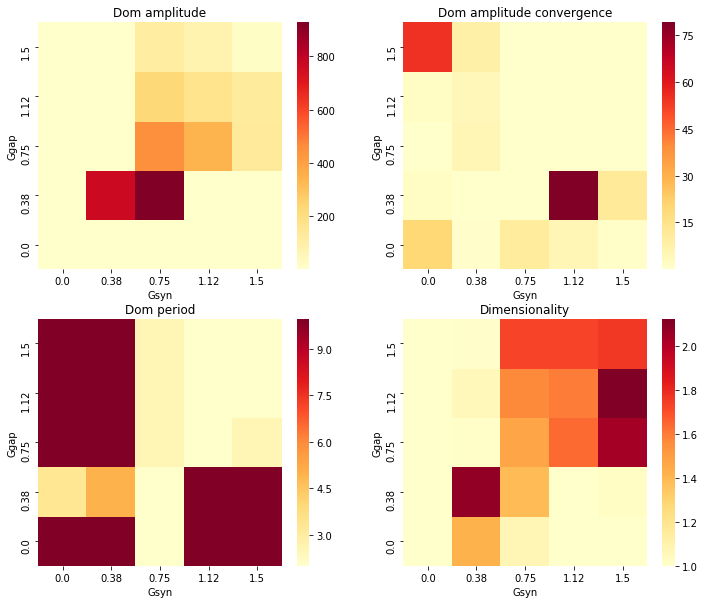

In [12]:
import seaborn as sns
import pandas as pd

def plot_heatmap(ax, ggap_vals, gsyn_vals, output_vals):
  ggap_vals = np.round(ggap_vals, 2)
  gsyn_vals = np.round(gsyn_vals, 2)
  df = pd.DataFrame.from_dict(np.array([ggap_vals,gsyn_vals,output_vals]).T)
  df.columns = ['Ggap','Gsyn','Output']
  df['Output'] = pd.to_numeric(df['Output'])
  pivotted = df.pivot('Ggap','Gsyn','Output')
  # See this for sample color palettes
  # https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
  return sns.heatmap(pivotted,cmap='YlOrRd', ax = ax)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 10))
ax = axes[0][0]
ax.set_title("Dom amplitude")
plot_heatmap(ax, ggap_vals, gsyn_vals, dom_amplitude_vals)
ax = axes[0][1]
ax.set_title("Dom amplitude convergence")
plot_heatmap(ax, ggap_vals, gsyn_vals, dom_amplitude_convergence_vals)
ax = axes[1][0]
ax.set_title("Dom period")
plot_heatmap(ax, ggap_vals, gsyn_vals, dom_period_vals)
ax = axes[1][1]
ax.set_title("Dimensionality")
_ = plot_heatmap(ax, ggap_vals, gsyn_vals, dimensionality_vals)

# Seaborn for some reason inverts the y-axis, so need to un-invert.
for ax in axes.reshape(-1):
  ax.invert_yaxis()